In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
seaborn.set_context('talk')

NameError: name 'seaborn' is not defined

In [4]:
t=pd.read_csv('transistors-per-microprocessor.csv').iloc[:,[2,-1]]
t.columns=['Year','NT']

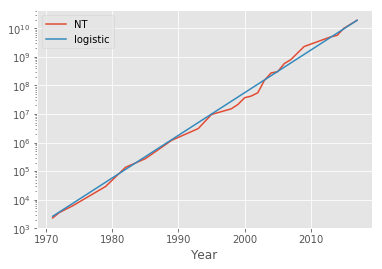

In [5]:
def logistic(x,L,k,x0):
    s1=L/(1+np.exp(-k*(x-x0)))
    return s1

from scipy.optimize import curve_fit

coef,_=curve_fit(logistic,t['Year'].values.squeeze(),t['NT'].values.squeeze(),
                 maxfev=100000,p0=[1e11,0.1,2020])
t['logistic']=logistic(t['Year'],*coef)
t.set_index('Year').plot()
plt.yscale('log')

(1000, 1e+18)

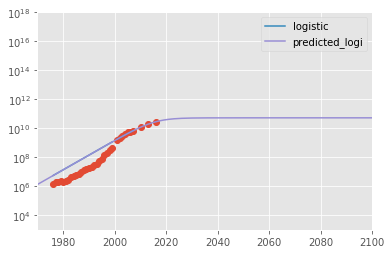

In [8]:
t=t.set_index('Year')
idx=np.arange(1970,2200)
pred=pd.DataFrame({'predicted_logi':logistic(idx,*coef)},index=idx)
#pred=pd.DataFrame({'predicted':logistic(idx,L,k,x0)},index=idx)

t2=pd.concat([t,pred],axis=1)



t2['NT'].plot(linewidth=0,marker='o')
t2.drop(columns='NT').plot(ax=plt.gca())
plt.xlim([1970,2100])
plt.yscale('log')
plt.ylim([1000,1e18])
#http://accelerating.org/articles/InnovationHuebnerTFSC2005.pdf

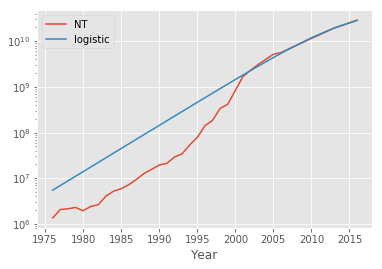

In [7]:
t=pd.read_csv('microprocessor-clock-speed.csv').iloc[:,[2,-1]]
t.columns=['Year','NT']
coef,_=curve_fit(logistic,t['Year'].values.squeeze(),t['NT'].values.squeeze(),
                 maxfev=1000000,p0=[1e11,0.1,2010])
t['logistic']=logistic(t['Year'],*coef)
t.set_index('Year').plot()
plt.yscale('log')

(1000, 1e+18)

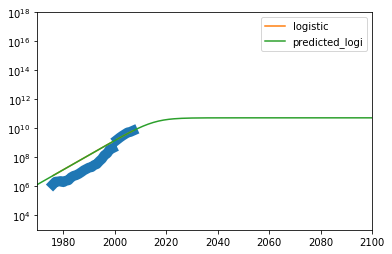

In [61]:
t=t.set_index('Year')
idx=np.arange(1970,2200)
pred=pd.DataFrame({'predicted_logi':logistic(idx,*coef)},index=idx)
#pred=pd.DataFrame({'predicted':logistic(idx,L,k,x0)},index=idx)

t2=pd.concat([t,pred],axis=1)



t2['NT'].plot(linewidth=10)
t2.drop(columns='NT').plot(ax=plt.gca())
plt.xlim([1970,2100])
plt.yscale('log')
plt.ylim([1000,1e18])
#http://accelerating.org/articles/InnovationHuebnerTFSC2005.pdf

In [195]:
#From Nordhaus
data="""
Year,value
1850.3331243690013, 2.700767836819323
1880.1043441256984, 2.677419999742958
1872.2560436625972, 1.497283225685761
1890.37019530787, 2.1446609137215296
1902.5520828127073, 1.6904062523651273
1902.0300051836482, 1.71015552372697
1905.1670405652603, 1.9853601207518703
1920.4930463429575, 2.4165454054741025
1938.257851513468, 2.9655408772789116
1944.5328361981437, 3.5946901163679037
1939.2997219679582, 2.729192221957247
1933.1942697125003, 1.7063213376382826
1941.201135547403, 1.5478559259952092
1945.0313803498318, 1.5473846852468789
1946.077363450853, 1.6653662326015763
1948.3448025715463, 2.019417974835743
1952.5166255164013, 1.448038567485244
1952.51411223241, 1.2315034436274677
1948.3356633570334, 1.2320175244438278
1949.0211044455136, 0.2870513038374698
1951.9817529870236, 0.36542720829840647
1952.6797604954595, 0.5031366069809309
1951.6376615606064, 0.7198002510427974
1950.9423958165244, 0.8183109874778465
1952.6847870634417, 0.9362068546964837
1948.3164710065557, -0.4215234213791943
1949.1853818263862, -0.5594256003678542
1953.0172259913547, -0.42210176229759977
1954.7575609150067, -0.48137099641714354
1956.6733687573094, -0.42255158301191464
1964.3393418908747, 0.04894620572657438
1955.9815302186698, -0.028765677679897017
1962.4191929216781, -0.38388842161481485
1959.6299046522884, -0.6985058812273399
1960.3196868676625, -1.2694568878975394
1961.1881407267674, -1.4467290894057951
1962.5770728523917, -1.7815456410944792
1964.3174077760434, -1.840814875214022
1973.0156551888604, -2.4324362147087104
1972.6656232730097, -2.589873464719063
1971.618726250537, -2.786595057112952
1972.3126211124422, -3.0032158611067885
1973.532020808849, -2.9443107675655007
1975.6233015698028, -2.767402706635499
1975.4471432100634, -2.944546387939665
1975.620331325086, -3.02330785301287
1977.3627225720033, -2.9054119857942347
1977.1883920551663, -2.925075577020017
1965.1771793813607, -2.7661175045945985
1966.3899531472455, -3.2780777375874486
1976.8328766106079, -3.5549530972655194
1978.398881017423, -3.6338859226108458
1979.6157674298386, -3.791515952927334
1980.3108046935577, -3.9097117006221804
1970.7356496482116, -3.8691635762317578
1983.0923246306115, -4.264384623842783
1982.742064234398, -4.4415068851129345
1982.3929462399985, -4.520204090084096
1980.8187165401218, -5.149931670091492
1982.5613362674019, -5.012350791613057
1983.6048060844319, -5.110904368116136
1984.8196361735822, -5.445699499770807
1984.2950452605317, -5.642485352266739
1986.3790146498752, -6.0954976516502715
1989.5117089045937, -6.194308268561532
1988.9862040700918, -6.469834166096655
1990.72379722939, -6.765323535333774
1991.2438185351837, -6.962237908033799
1992.8022830900254, -7.690776104952455
1994.8883088026344, -7.966623302997807
1998.7151263996207, -8.262369712643103
2000.4545474018212, -8.40037899180184
1997.1454663070003, -8.498397067454546
1997.8395896492682, -8.695332860188584
2000.449520833839, -8.833449239517392
1998.7046163029306, -9.167880230593807
1999.9237875189744, -9.128660148312317
2000.094462350006, -9.4239567372433
2001.6620661193608, -9.365094483770042
2002.184372228783, -9.365158743872087
2001.833197911118, -9.621021050181428
2002.1795741411636, -9.778543980327843
2003.0496273628082, -9.81802110301751
2005.1351961146913, -10.133238323582457
2005.6563598222992, -10.231727639983491
2003.5673638649737, -10.211785588315514
2003.9196805844526, -9.857498225707184
2003.9203660255412, -9.798443191927788
1941.7163587655775, 0.9375563168394301


"""
from io import StringIO, BytesIO
t=pd.read_csv(StringIO(data))
t['value']=np.log(1/10**t['value'])
t_exp=t.copy()
t_exp['value']=np.exp(t.value)

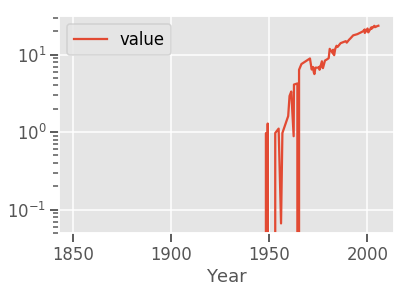

In [196]:
t.sort_values('Year').set_index('Year').plot()
plt.yscale('log')

/home/jose/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


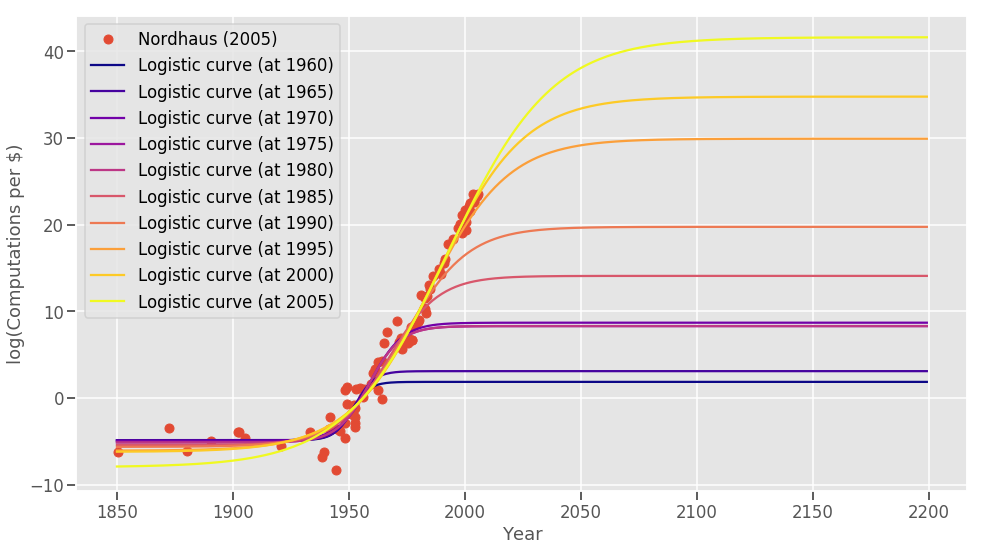

In [318]:
import seaborn
plt.style.use('ggplot')
def logistic(x,L,k,x0,a):
    s1=a+L/(1+np.exp(-k*(x-x0)))
    return s1
idx=np.arange(1850,2200)

seaborn.set_context('talk')

dfs=[]
ran=range(1960,2006,5)
for year in ran:
    to_fit=t.query('Year<@year and Year>(@year-100)')
    coef,_=curve_fit(logistic,to_fit['Year'].values.squeeze(),to_fit['value'].values.squeeze(),
                     maxfev=1000000,p0=[20,0.01,1950,-5])


    pred=pd.DataFrame({f'logistic_{year}':logistic(idx,*coef)},index=idx)
    dfs.append(pred)
df=pd.concat(dfs,axis=1)

plt.figure(figsize=(14,8))
t.set_index('Year').value.plot(marker='o',linewidth=0)

df.plot(ax=plt.gca(),colormap='plasma')



plt.ylabel('log(Computations per $)')

plt.legend(['Nordhaus (2005)']+[f'Logistic curve (at {y})' for y in ran])
plt.tight_layout()
plt.savefig('nordhaus_dollars_log.png')

/home/jose/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jose/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


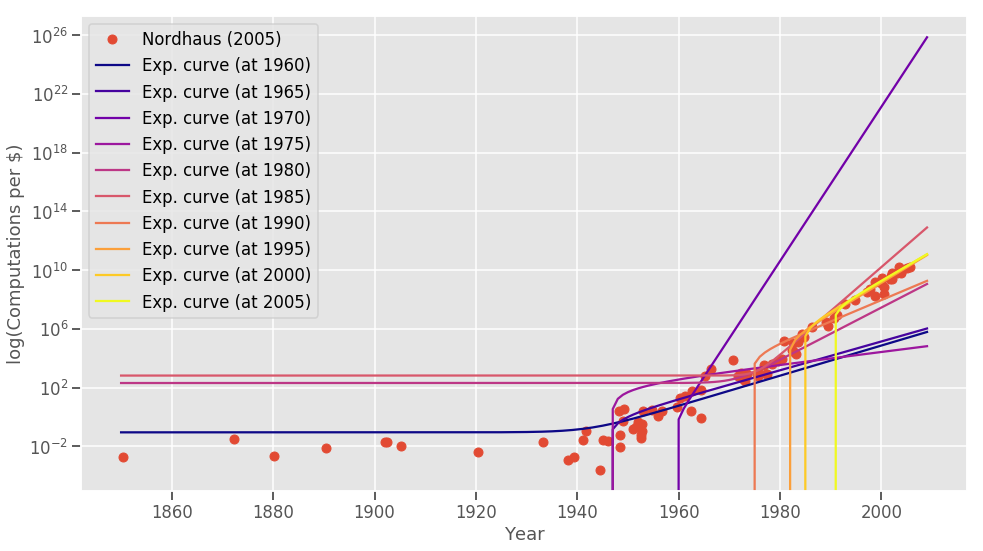

In [199]:
plt.style.use('ggplot')
def expo(x,a,b,c):
    s1=c+a*np.exp(b*(x-x[0]))
    return s1
idx=np.arange(1850,2010)

seaborn.set_context('talk')

dfs=[]

ran=range(1960,2006,5)
for year in ran:
    to_fit=t_exp.query('Year<@year')
    coef,_=curve_fit(expo,to_fit['Year'].values.squeeze(),to_fit['value'].values.squeeze(),
                     maxfev=1000000,p0=[1,0.1,0.1])


    pred=pd.DataFrame({f'exp_{year}':expo(idx,*coef)},index=idx)
    dfs.append(pred)
df=pd.concat(dfs,axis=1)

plt.figure(figsize=(14,8))
t_exp.set_index('Year').value.plot(marker='o',linewidth=0)

df.plot(ax=plt.gca(),colormap='plasma')



plt.ylabel('log(Computations per $)')

plt.legend(['Nordhaus (2005)']+[f'Exp. curve (at {y})' for y in ran])
plt.yscale('log')
plt.tight_layout()
plt.savefig('nordhaus_dollars_exp.png')

${\displaystyle N(T)=N(0)\exp(-c(\exp(at)-1))}$



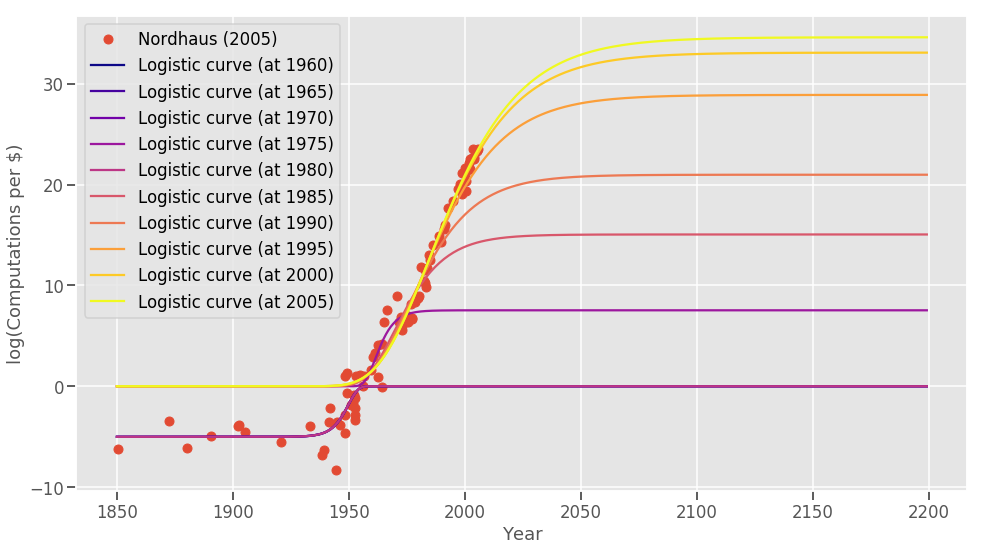

In [207]:
def logistic(x,N,c,a):
    s1=N*np.exp(-c*np.exp(a*(x-x[0]))-1)
    return s1
idx=np.arange(1850,2200)

seaborn.set_context('talk')

dfs=[]
ran=range(1960,2006,5)
for year in ran:
    to_fit=t.query('Year<@year')
    coef,_=curve_fit(logistic,to_fit['Year'].values.squeeze(),to_fit['value'].values.squeeze(),
                     maxfev=1000000,p0=[30,1,0.01])


    pred=pd.DataFrame({f'logistic_{year}':logistic(idx,*coef)},index=idx)
    dfs.append(pred)
df=pd.concat(dfs,axis=1)

plt.figure(figsize=(14,8))
t.set_index('Year').value.plot(marker='o',linewidth=0)

df.plot(ax=plt.gca(),colormap='plasma')



plt.ylabel('log(Computations per $)')

plt.legend(['Nordhaus (2005)']+[f'Logistic curve (at {y})' for y in ran])
plt.tight_layout()
plt.savefig('nordhaus_dollars_gomp.png')

/home/jose/envs/env/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


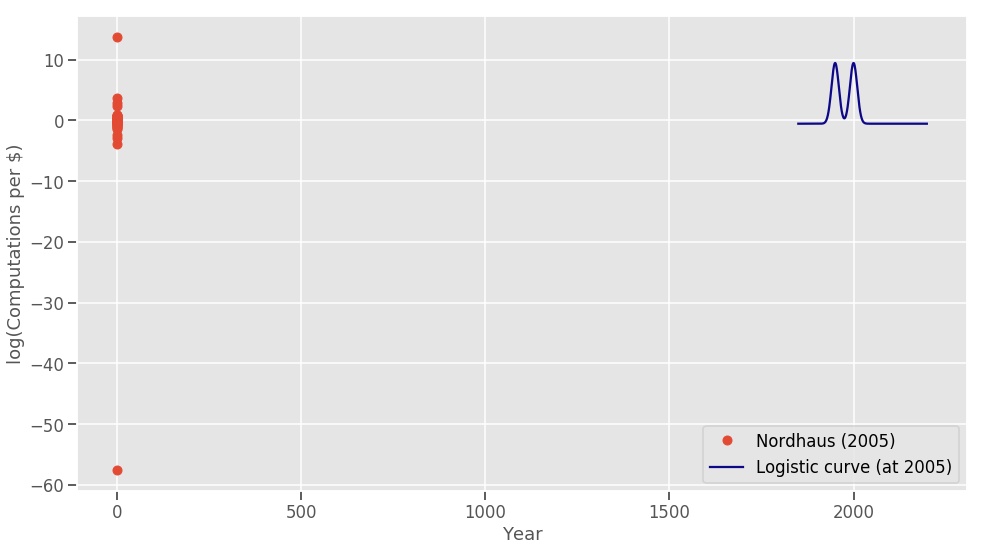

In [254]:
df_o=t.sort_values('Year').pct_change()

def gauss(x,A,mu,sigma):

    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,mu2,A1,A2,sigma,b):

    return gauss(x,A1,mu1,sigma)+gauss(x,A2,mu2,sigma)-b

dfs=[]
ran=[2005]
for year in ran:
    to_fit=df_o.query('Year<@year')
    coef,_=curve_fit(bimodal,to_fit['Year'].values.squeeze(),to_fit['value'].values.squeeze(),
                     maxfev=1000000,p0=[1950,2000,10,10,10,5])


    pred=pd.DataFrame({f'gaussian_{year}':bimodal(idx,*coef)},index=idx)
    dfs.append(pred)
df=pd.concat(dfs,axis=1)

plt.figure(figsize=(14,8))
df_o.set_index('Year').value.plot(marker='o',linewidth=0)

df.plot(ax=plt.gca(),colormap='plasma')



plt.ylabel('log(Computations per $)')

plt.legend(['Nordhaus (2005)']+[f'Logistic curve (at {y})' for y in ran])
plt.tight_layout()
plt.savefig('nordhaus_dollars_bimo.png')

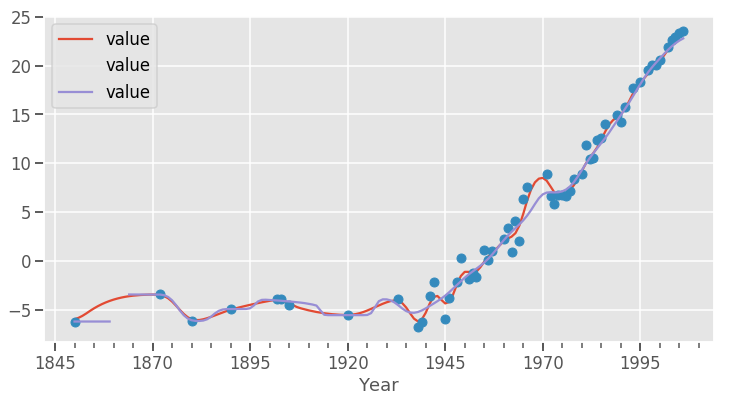

In [372]:
plt.figure(figsize=(12,6))
(
    t.sort_values("Year")
    .assign(Year=lambda x: x.Year.round().astype(int))
    .groupby("Year")
    .mean()
    .reset_index()
    .assign(Year=lambda x: pd.to_datetime(x.Year, format="%Y"))
    .set_index("Year")
    .resample("Y")
    .mean()
    .interpolate("pchip")
    .rolling(min_periods=0, window=10, center=True, win_type="bohman")
    .mean()
    .plot(ax=plt.gca())
)
(
    t.sort_values("Year")
    .assign(Year=lambda x: x.Year.round().astype(int))
    .assign(Year=lambda x: pd.to_datetime(x.Year, format="%Y"))
    .groupby("Year")
    .mean()
    .plot(ax=plt.gca(),linewidth=0,marker='o')
)
(
    t.sort_values("Year")
    .assign(Year=lambda x: x.Year.round().astype(int))
    .groupby("Year")
    .mean()
    .reset_index()
    .assign(Year=lambda x: pd.to_datetime(x.Year, format="%Y"))
    .set_index("Year")
    .resample("Y")
    .mean()
    .rolling(min_periods=0, window=20, center=True, win_type="bohman")
    .mean()
    .plot(ax=plt.gca())
)

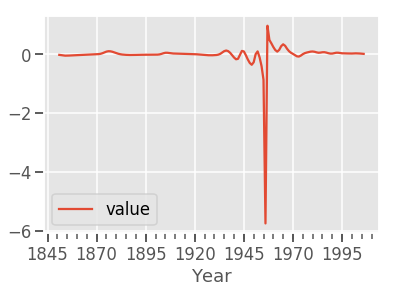

In [375]:
moore_growth=(
    t.sort_values("Year")
    .assign(Year=lambda x: x.Year.round().astype(int))
    .groupby("Year")
    .mean()
    .reset_index()
    .assign(Year=lambda x: pd.to_datetime(x.Year, format="%Y"))
    .set_index("Year")
    .resample("Y")
    .mean()
    .interpolate("pchip")
    .rolling(min_periods=0, window=10, center=True, win_type="bohman")
    .mean()
    .pct_change()

).plot()

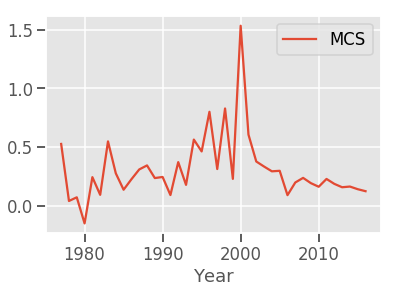

In [553]:

t=pd.read_csv('microprocessor-clock-speed.csv').iloc[:,[2,-1]]
t.columns=['Year','MCS']
t=t.set_index('Year')
for i in [2000,2008,2009,2011,2012,2015,2014]:
    t.loc[i,'MCS']=np.nan
t=t.sort_index()
t=t.interpolate()
t.pct_change().plot()

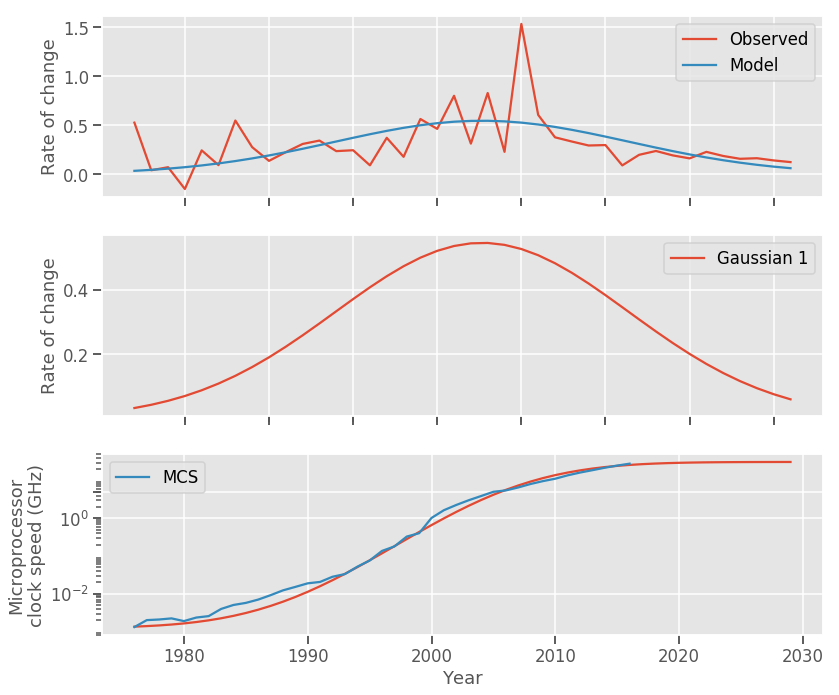

In [556]:
t=t.copy()
def gauss(x, A, mu, sigma):

    return A*np.exp(-(x - mu) ** 2 / 2 / sigma ** 2)


def bimodal(x, mu1, mu2, A1, A2, sigma1, sigma2):

    return gauss(x, A1, mu1, sigma1) + gauss(x, A2, mu2, sigma2) + 0


from scipy.optimize import curve_fit

this = t.reset_index(drop=True).pct_change().dropna().copy()

to_fit = this.copy()
to_fit.index=to_fit.index.astype(float)

# coef, _ = curve_fit(
#     bimodal,
#     to_fit.index.values.squeeze(),
#     to_fit.values.squeeze(),
#     maxfev=10000000,
#     p0=[10,30,1,1,1,1],
#     bounds=[(0, 0, 0, 0, 0, 0), (300, 300, 1, 1, 100, 100)],
# )
FUNCTION=gauss
coef, _ = curve_fit(
    gauss,
    to_fit.index.values.squeeze(),
    to_fit.values.squeeze(),
    maxfev=10000000,
    p0=[0.5,15,15],
    bounds=[(0,0,0),(10,40,100)]
)


plt.figure(figsize=(12, 10))
ax = plt.subplot(3, 1, 1)
this.index = t.index[1:]
this.plot(ax=plt.gca())
k = pd.DataFrame({"Model": FUNCTION(to_fit.index, *coef)}).set_index(t.index[1:])
k.plot(ax=plt.gca())

plt.legend(["Observed", "Model"])
plt.ylabel("Rate of change")
plt.subplot(3, 1, 2, sharex=ax)
k = pd.DataFrame(
#     {
#         "Gaussian 1": gauss(to_fit.index, coef[2], coef[0], coef[4]),
#         "Gaussian 2": gauss(to_fit.index, coef[3], coef[1], coef[5]),
#     }
   {"Gaussian 1": FUNCTION(to_fit.index, *coef)}
).set_index(t.index[1:])
k.plot(ax=plt.gca())
plt.ylabel("Rate of change")


plt.subplot(3, 1, 3)
tmax=np.arange(1976,2030).astype(float)

plt.plot(tmax,np.cumprod((FUNCTION(tmax-t.index[0], *coef)+1))*t.iloc[0,0]/1.024e9)
t.pipe(lambda x: x/1.024e9).plot(ax=plt.gca())
plt.yscale('log')
plt.ylabel("Microprocessor\nclock speed (GHz)")
plt.yticks([0.01,1,5])
plt.tight_layout()
plt.savefig('sumgaus_moore.png')

In [525]:
t.tail(10)

,MCS
Year,
2001,1.684000e+09
2002,2.317000e+09
2003,3.088000e+09
2004,3.990000e+09
2005,5.173000e+09
2006,5.631000e+09
2007,6.739000e+09
2010,1.151100e+10
2013,1.934800e+10


In [499]:
t

,MCS
Year,
1976,1.350000e+06
1977,2.060000e+06
1978,2.140000e+06
1979,2.290000e+06
1980,1.940000e+06
1981,2.410000e+06
1982,2.630000e+06
1983,4.070000e+06
1984,5.190000e+06
